In [1]:
from diff_viz import msd
from diff_viz import diffusion_modes
from diff_viz import data_loading
from diff_viz import diff_utils
import pandas as pd
from os import getcwd, chdir
from diff_predictor import data_process
from diff_viz import diff_utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
msd_data_path = '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/msd_data/'

In [43]:
msd_files = [
    '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/msd_data/msd_P17_1h_OGD_1d_40nm_slice_1_cortex_vid_1.csv',
    '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/msd_data/msd_P17_NT_1d_40nm_slice_1_cortex_vid_1.csv',
    '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/msd_data/msd_P17_1h_OGD_1d_40nm_slice_1_striatum_vid_1.csv',
    '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/msd_data/msd_P17_2h_OGD_1d_40nm_slice_1_cortex_vid_1.csv',
    '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/msd_data/msd_P17_3h_OGD_1d_40nm_slice_1_cortex_vid_1.csv'
]

In [56]:
phuong_msd_files = [
    '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/phuong_data/msd_100X_OGD_QD-BEV_Striatum_Slice1_Video1.csv',
    '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/phuong_data/msd_100X_OGD_QD-BEV_Striatum_Slice2_Video1.csv',
    '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/phuong_data/msd_100X_OGD_QD-BEV_Striatum_Slice2_Video4.csv'
]

In [44]:
geo_means = []
geo_sems = []
for file in msd_files:
    msd_data = pd.read_csv(file)
    geo_mean, geosem = msd.get_geo_data(msd_data)
    geo_means.append(geo_mean)
    geo_sems.append(geosem)

In [50]:
def get_mean_geo_data(msd_files):
    """takes in a list of msd files and returns the mean of the geometric means and geometric standard errors

    Args:
        msd_files (list of string): files to average

    Returns:
        numpy array: averaged values across multiple CSVs
    """
    geo_means = []
    geo_sems = []
    
    for file in msd_files:
        msd_data = pd.read_csv(file)
        geo_mean, geosem = msd.get_geo_data(msd_data)
        geo_means.append(geo_mean[1:])
        geo_sems.append(geosem)

    averaged_geo_means = np.mean(geo_means, axis=0)
    averaged_geo_sems = np.mean(geo_sems, axis=0)
    return averaged_geo_means, averaged_geo_sems

In [ ]:
averaged_geo_means, averaged_geo_sems = get_mean_geo_data(msd_files)

In [61]:
averaged_geo_means.shape

(650,)

In [57]:
phuong_averaged_geo_means, phuong_averaged_geo_sems = get_mean_geo_data(phuong_msd_files)

In [60]:
phuong_averaged_geo_means.shape

(650,)

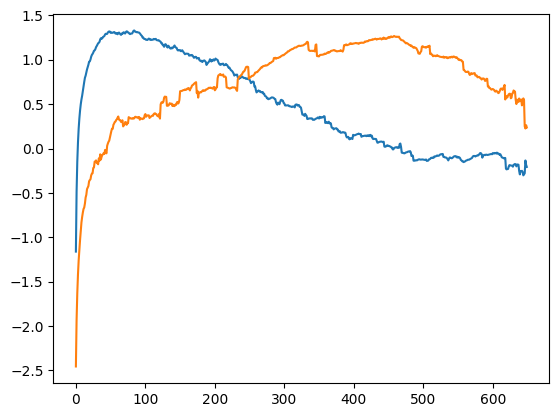

In [63]:
plt.plot(averaged_geo_means)
plt.plot(phuong_averaged_geo_means)

In [3]:
msd_df = pd.read_csv(msd_data_path + 'msd_P17_1h_OGD_1d_40nm_slice_1_striatum_vid_1.csv')
geo_mean_df = pd.read_csv(msd_data_path + 'geomean_P17_1h_OGD_1d_40nm_slice_1_striatum_vid_1.csv').rename(columns={'nan': 'OGD'})
geo_sem_df = pd.read_csv(msd_data_path + 'geoSEM_P17_1h_OGD_1d_40nm_slice_1_striatum_vid_1.csv').rename(columns={'0.000000000000000000e+00': 'OGD'})

In [4]:
geo_mean, geosem = msd.get_geo_data(msd_df)

0.583001195830235

In [9]:
geo_mean_df

,OGD
0,-1.179269
1,-0.483949
2,-0.130792
3,0.094411
4,0.254050
...,...
645,-1.385015
646,-1.313660
647,1.681638
648,1.567590


In [18]:
new_df = pd.DataFrame(geo_mean[1:])
new_df

,0
0,-1.191227
1,-0.501806
2,-0.149899
3,0.075542
4,0.232149
...,...
645,-0.553133
646,-0.577066
647,-0.008109
648,0.036453


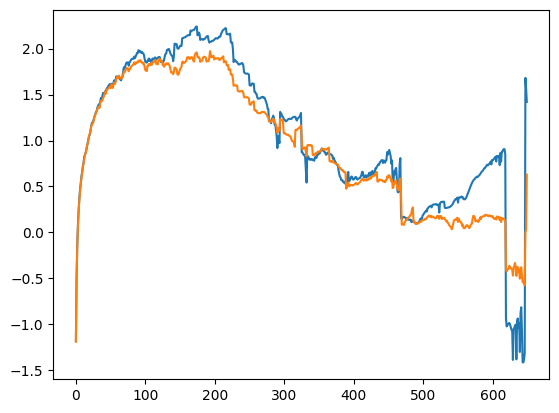

In [21]:
plt.plot(geo_mean_df['OGD'], label='ogd')
plt.plot(new_df, label='new')

In [83]:
fake_nt_geomean_df = geo_mean_df.copy().rename(columns={'OGD': 'NT'})/2
fake_nt_geosem_df = geo_sem_df.copy().rename(columns={'OGD': 'NT'})/2

In [85]:
full_geomean_df = pd.concat([geo_mean_df, fake_nt_geomean_df], axis=1)
full_geosem_df = pd.concat([geo_sem_df, fake_nt_geosem_df], axis=1)

In [90]:
full_geomean_df.head()

,OGD,NT
0,-1.179269,-0.589635
1,-0.483949,-0.241975
2,-0.130792,-0.065396
3,0.094411,0.047206
4,0.254050,0.127025


In [91]:
full_geosem_df.head()

,OGD,NT
0,0.022325,0.011163
1,0.024767,0.012383
2,0.026421,0.013211
3,0.027914,0.013957
4,0.029273,0.014636


In [ ]:
fig = msd.plot_individual_msds(msd_df, x_range=1, y_range=10)

In [153]:
def testing_msd_viz(doses,geomean_df,geosem_df,fps):
    """
    Visualize MSD data from diffusivity experiments.
    
    Parameters
    ----------
        doses (list):
            List of doses used in the experiment.
        geomean_df (pandas.DataFrame):
            DataFrame containing the mean-squared displacement data.
        geosem_df (pandas.DataFrame):
            DataFrame containing the standard error of the mean-squared displacement data.
        fps (int):
            Frames per second of the experiment.

    Returns
    -------
        fig (matplotlib.figure.Figure):
            Figure containing the MSD data.

    """
    count=0
    msd_dose_list=diff_utils.get_df_dose_list(doses,geomean_df)
    sem_dose_list=diff_utils.get_df_dose_list(doses,geosem_df)
    
    if len(doses)==1:
        tau=geomean_df.index.values/651
        fig,ax=plt.subplots(figsize=(6,6))
        plt.rcParams.update({'font.family':'helvetica'})
        handles=list(geomean_df.columns)
        #print('tau',tau)
        print('geomean_df[handle]', geomean_df[handles[0]]/2)#+geosem_df[handles[0]]/2)
        #print('geosem_df[handle]',geosem_df[handle])
    
        for handle in handles:
            ax.loglog(tau,geomean_df[handle])
            ax.set_xlabel('Lag time (s)',fontsize=16)
            ax.set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)
            
            
            ax.fill_between(tau,geomean_df[handle]+geosem_df[handle]/2,geomean_df[handle]-geosem_df[handle]/2,cmap='ocean',alpha=0.2)
            #ax.legend(handles,loc='best')
            #ax.set_xlim([0.008, 0.2])
            #ax.set_ylim([0.008,1])
            #ax.set_title(f'\n{doses[c]}\n', fontsize=16)
         
    else:                
        tau=geomean_df.index.values/651
        #fig,axes=plt.subplots(nrows=1,ncols=len(doses),figsize=(len(doses)*6,6))
        fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(len(doses)*6,6))
        plt.rcParams.update({'font.family':'helvetica'})
        count=0
        
        for c in np.arange(0,len(doses)):
            while count<=c:
                sem_handles = list(sem_dose_list[c].columns)
                msd_handles = list(msd_dose_list[c].columns)
                print(msd_dose_list[count].values.flatten().shape)
                #print(msd_dose_list[count]+sem_dose_list[count]/2)
                axes.loglog(tau,msd_dose_list[count], label=doses[c])
                axes.fill_between(tau,
                                    (msd_dose_list[count]+sem_dose_list[count]/2).values.flatten(),
                                    (msd_dose_list[count]-sem_dose_list[count]/2).values.flatten(),
                                    cmap='ocean',
                                    alpha=0.2)
                axes.set_xlabel('\nLag time (s)',fontsize=16)               
                

                #axes[c].set_xlim([0.008, 1])
                #axes[c].set_ylim([0.008,1])
                axes.set_title(f'\n{doses[c]}\n', fontsize=16)
    
                if c == 0:
                    axes.set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)
    
                count+=1
                axes.legend(loc='best')
    return fig

(650,)
(650,)


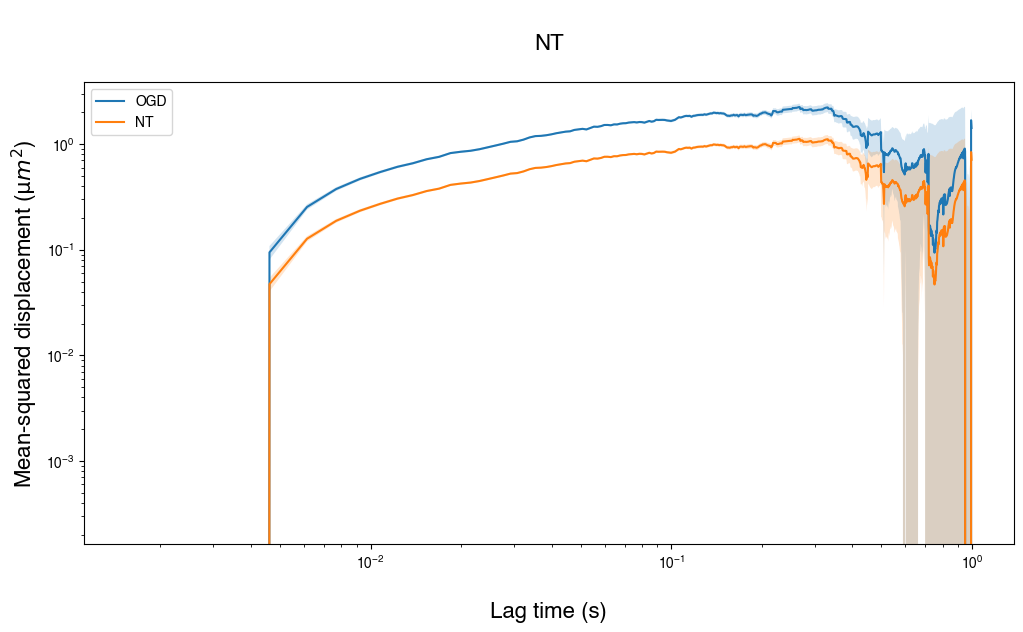

In [154]:
fig = testing_msd_viz(['OGD', 'NT'], full_geomean_df, full_geosem_df, fps=33)